## 365 Data Science Course - Time Series Analysis using Python

> Sincere thanks to the 365 Data Science team for providing 1 month free subscription 
to encorage people to stay at home and improve their skills during the tough times of COVID-19 pandemic
[course link](https://365datascience.teachable.com/courses/666338/)


### Introduction to TS in Python

For analyzing TS data effectively, **all time periods must be EQUAL and CLEARLY DEFINED, thus freq should be CONSTANT**

- Patterns observed in TS are expected to persist in the future

- TS data is usually time dependent, that means that the values for every period are affected by outside factors and by the values of past periods

- TS data suffers from **seasonality**. Rain, temp vary depending on time of daya nd season of the year.. Its a repeating cycle, so we can account for these changes while making predictions


Examples:

1. Weather forecast
2. Finance 

#### Common Notations

X = value at each time period
T = entire period
t = a single period

#### Peculiarities of TS data

In TS analysis intevals bw 2 data pts should be identical

But often, in real world there is missing data

In TS handling of missing data is complicated, as values bw consecutive periods usually affect each other

---

Also in some cases we want to change the freq

For eg, from daily we might want to do a monthly analysis - so we need to aggregate the data in some manner

If we want to reach a more granular level from a broad level, it becomes much mor complex.. now we will need some way to impute the values

---

Unlike regular data, TS data requires chronological order. From ML perspective that means we cannot simply suffle the data into training and test sets

We must pick a cut off pt.. period before - train, period after - test



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# import the data

raw_csv_data = pd.read_csv('./data/Index2018.csv')

df_comp = raw_csv_data.copy()

In [5]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


#### Data DESC

Date is used as the index here

The next 4 cols represent closing prices for 4 market indices

- S&P 500 (USA)
- DAX 30 (Germany)
- FTSE 100 (London)
- NIKKEI 225 (Japan)

Each Market Index is a portfolio of the most traded public companies on the resp stock exchange markets

For eg S&P 500 measures stability of the US stock exchange for 500 companies included in this particular portfolio



In [6]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Values for dax and ftse are somewhat similar. max value of spx is less than min value of ftse and nikkei. So dax is lower. nikkei is generally higher than the other 3

In [9]:
# check missing values
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Plotting the data

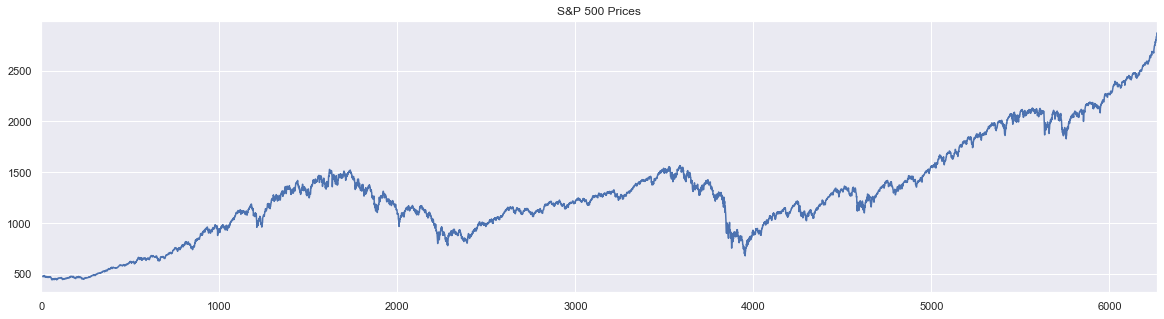

In [15]:
# S&P500

df_comp['spx'].plot(figsize=(20, 5), title='S&P 500 Prices');

The x axis is not proper for now as it is not showing the dates

- The price fluctuates - there are periods of booming growth followed by sharp falls

- The 1st 2 peaks followed by period of turbulence represent dot com and the housing market bubble



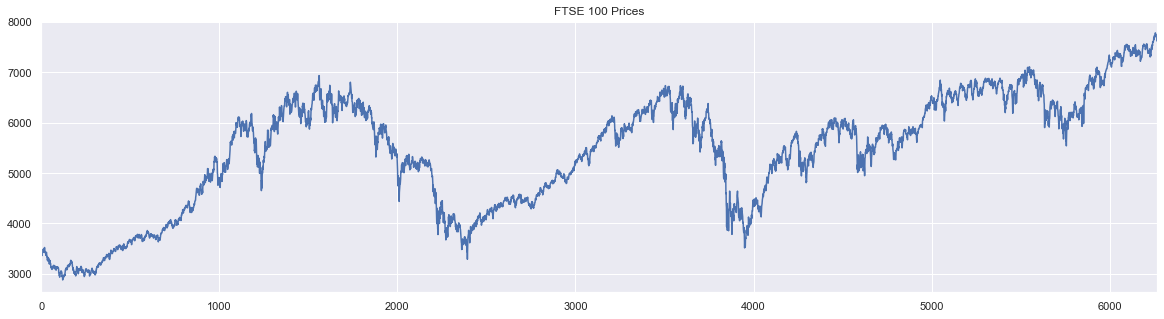

In [16]:
# FTSE

df_comp['ftse'].plot(figsize=(20, 5), title='FTSE 100 Prices');

The above 2 plots are mostly similar

This can be explained by the parallel of the UK and US stock exchange markets

